## Use of Keras in Data Science

In [7]:
import sys
assert sys.version_info >= (3,5)

import sklearn
assert sklearn.__version__ >= "0.20"

try:
    %tensorflow_version 2.x
except Exception:
    pass

import tensorflow
assert tensorflow.__version__ >= "0.20"

import numpy as np
import os

import tensorflow as tf
from tensorflow import keras

In [8]:
keras.__version__

'2.6.0'

In [9]:
tf.__version__

'2.6.0'

In [10]:
# https://keras.io/api/datasets/fashion_mnist/
# https://www.kaggle.com/code/gpreda/cnn-with-tensorflow-keras-for-fashion-mnist/notebook

fashion_mnist = keras.datasets.fashion_mnist
(X_train_full,Y_train_full),(X_test,Y_test) = fashion_mnist.load_data()

In [11]:
help(fashion_mnist)

Help on package keras.api._v2.keras.datasets.fashion_mnist in keras.api._v2.keras.datasets:

NAME
    keras.api._v2.keras.datasets.fashion_mnist - Public API for tf.keras.datasets.fashion_mnist namespace.

PACKAGE CONTENTS


FILE
    /usr/local/anaconda/envs/tensorflow2/lib/python3.6/site-packages/keras/api/_v2/keras/datasets/fashion_mnist/__init__.py




In [12]:
dir(fashion_mnist)

['__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '_sys',
 'load_data']

In [13]:
X_train_full.size

47040000

In [14]:
X_train_full.shape

(60000, 28, 28)

In [15]:
X_test.shape

(10000, 28, 28)

In [16]:
type(X_train_full)

numpy.ndarray

In [17]:
X_valid, X_train = X_train_full[:5000] / 255.,X_train_full[5000:] / 255.
Y_valid, Y_train = Y_train_full[:5000], Y_train_full[5000:]
X_test = X_test/255.

In [18]:
X_train_full[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,
          0,   0,  13,  73,   0,   0,   1,   4,   0,   0,   0,   0,   1,
          1,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
          0,  36, 136, 127,  62,  54,   0,   0,   0,   1,   3,   4,   0,
          0,   3],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   6,
          0, 102, 204, 176, 134, 144, 123,  23,   0,   0,   0,   0,  12,
         10,   0],
       [  

In [19]:
X_test.shape

(10000, 28, 28)

In [20]:
X_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.00392157,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.17254902, 0.49803922, 0.71372549, 0.7254902 ,
        0.63137255, 0.47058824, 0.21568627, 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.16470588,
        0.77647059, 0.98431373, 1.        , 0.98431373, 0.97647059,
        0.96862745, 1.    

In [21]:
Y_train[0]

4

In [22]:
Y_train.shape

(55000,)

In [23]:
class_names = ["T-Shirt/top","Trouser","Pullover","Dress","Coat",
              "Sandal","Shirt","Sneaker","Bag","Ankle Boot"]

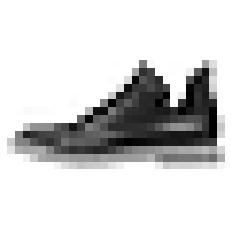

In [24]:
import matplotlib.pyplot as plt 

plt.imshow(X_train[40],cmap="binary")
plt.axis("off")
plt.show()

In [25]:
Y_train

array([4, 0, 7, ..., 3, 0, 5], dtype=uint8)

In [26]:
class_names[Y_train[40]]

'Ankle Boot'

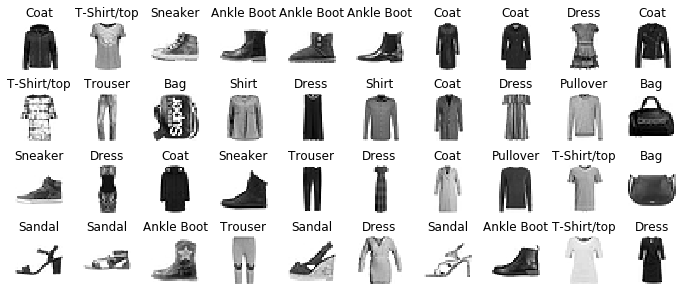

In [27]:
n_rows = 4
n_cols = 10
plt.figure(figsize=(n_cols * 1.2, n_rows * 1.2))
for row in range(n_rows):
    for col in range(n_cols):
        index = n_cols * row + col
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow(X_train[index], cmap="binary", interpolation="nearest")
        plt.axis('off')
        plt.title(class_names[Y_train[index]], fontsize=12)
plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

In [28]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=(28,28)))# Add flatten layer
model.add(keras.layers.Dense(300,activation="relu"))
model.add(keras.layers.Dense(100,activation="relu"))
model.add(keras.layers.Dense(10,activation="softmax"))

In [29]:
model.layers

In [30]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 300)               235500    
_________________________________________________________________
dense_1 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


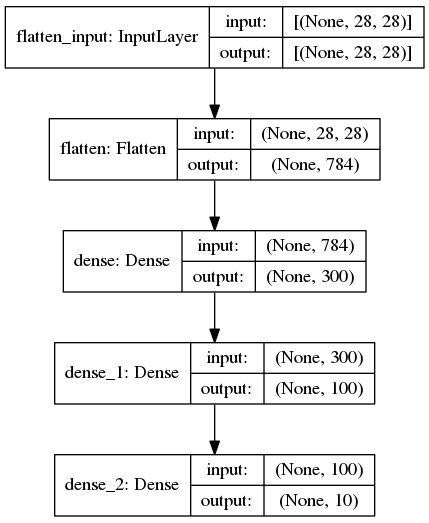

In [31]:
keras.utils.plot_model(model,"my_fashion_mnist_model.png",show_shapes=True)

In [32]:
hidden1=model.layers[1] # first layer
hidden1.name

'dense'

In [33]:
model.get_layer(hidden1.name) is hidden1

True

In [34]:
weights, biases = hidden1.get_weights()
weights

array([[ 0.0093983 ,  0.00492708,  0.01170551, ...,  0.017823  ,
        -0.02020512,  0.03088432],
       [ 0.03218429,  0.02992772,  0.07104257, ...,  0.05250463,
        -0.06469123,  0.05439956],
       [ 0.02342027,  0.05694714,  0.06338806, ..., -0.05624276,
         0.04724254, -0.0119065 ],
       ...,
       [-0.02482539,  0.02130698, -0.07271942, ..., -0.04732062,
        -0.06289004, -0.00962585],
       [-0.01439083, -0.03555381, -0.0248519 , ..., -0.04902305,
         0.02174471, -0.01093353],
       [ 0.03020072,  0.03347621, -0.03871118, ...,  0.07030551,
         0.00848856,  0.02524144]], dtype=float32)

In [35]:
biases # pretrained bias values, post trained these would change

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [36]:
weights.shape

(784, 300)

In [37]:
biases.shape

(300,)

In [38]:
#sgd = keras.optimizers.SGD(learning_rate=0.001)
# Compiling the model we created

model.compile(loss="sparse_categorical_crossentropy",
              #optimizer=keras.optimizers.SGD(lr=1e-3),
              optimizer="sgd",
             metrics=["accuracy"]
             # metrics=[keras.metrics.sparse_categorical_accuracy, ]
             )


In [39]:
history = model.fit(X_train,Y_train, epochs = 30, validation_data=(X_valid,Y_valid))

Epoch 1/30
1719/1719 [==============================] - 5s 2ms/step - loss: 0.6974 - accuracy: 0.7708 - val_loss: 0.5026 - val_accuracy: 0.8310
Epoch 2/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.4838 - accuracy: 0.8316 - val_loss: 0.4376 - val_accuracy: 0.8514
Epoch 3/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.4395 - accuracy: 0.8465 - val_loss: 0.4153 - val_accuracy: 0.8564
Epoch 4/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.4127 - accuracy: 0.8566 - val_loss: 0.3986 - val_accuracy: 0.8618
Epoch 5/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.3938 - accuracy: 0.8619 - val_loss: 0.3805 - val_accuracy: 0.8680
Epoch 6/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.3770 - accuracy: 0.8683 - val_loss: 0.4045 - val_accuracy: 0.8588
Epoch 7/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.3639 - accuracy: 0.8723 - val_loss: 0.3906 - val_accuracy:

In [40]:
weights, biases = hidden1.get_weights()

In [41]:
weights

array([[ 0.00941256,  0.0049436 ,  0.01170549, ...,  0.01780842,
        -0.02028191,  0.03083184],
       [ 0.03218657,  0.02997358,  0.07104757, ...,  0.05259441,
        -0.06473033,  0.05432421],
       [ 0.02370461,  0.05695418,  0.06332103, ..., -0.05634498,
         0.04705902, -0.01200998],
       ...,
       [-0.04385758,  0.02201056, -0.07361827, ..., -0.04109516,
        -0.06184161,  0.00224003],
       [-0.02619013, -0.03704552, -0.02505504, ..., -0.04790349,
         0.01714126, -0.00105827],
       [ 0.02872086,  0.03299038, -0.03875358, ...,  0.06970643,
         0.0067637 ,  0.02687983]], dtype=float32)

In [42]:
biases

array([ 6.00311719e-02,  3.28818187e-02,  1.15047432e-02,  5.14736995e-02,
        2.61282861e-01, -8.14091936e-02, -1.18869171e-02,  1.01587318e-01,
        1.93785504e-02,  1.50030665e-02,  6.00614958e-02, -9.82663594e-03,
        6.63861260e-02,  8.47704243e-03,  5.00063449e-02,  8.47193599e-03,
        3.50675806e-02,  8.97646993e-02,  3.51697840e-02,  9.01204441e-03,
       -7.31621236e-02, -7.34149814e-02,  1.56321041e-02, -4.71882224e-02,
        1.40556335e-01,  1.35127589e-01,  1.60731748e-02, -1.62022386e-03,
        6.05941080e-02, -6.12273440e-02,  9.72122252e-02,  1.01190783e-01,
        4.71781865e-02,  1.39127085e-02,  1.86833426e-01,  2.25619413e-02,
        6.37705922e-02, -1.12263924e-02,  3.81696634e-02, -6.34145215e-02,
        2.38429625e-02,  7.76730105e-02,  4.60728705e-02,  9.17500407e-02,
        3.63214849e-03, -2.80038230e-02,  5.85315488e-02,  1.85639202e-03,
        2.95785852e-02,  3.31543237e-02, -4.43187058e-02,  8.60832259e-02,
       -8.44734758e-02,  

In [43]:
history.params

{'verbose': 1, 'epochs': 30, 'steps': 1719}

In [44]:
print(history.epoch)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]


In [45]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

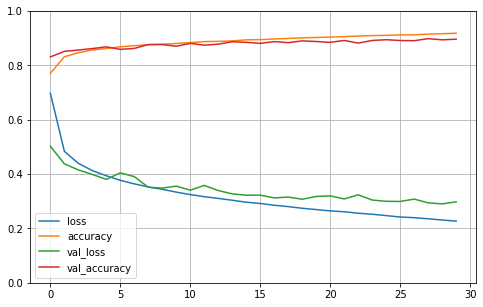

In [46]:
# Plotting the mean training loss and accuracy measured over each epoch
# and the mean validation loss and accuracy measured at the end of each epoch

# val_loss: validation loss

import pandas as pd

pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1) # setting limits for y-axis
plt.show()

In [47]:
model.evaluate(X_test, Y_test) # Evaluating the model

313/313 [==============================] - 0s 2ms/step - loss: 0.3352 - accuracy: 0.8817


[0.3352147340774536, 0.8816999793052673]

In [48]:
class_names

['T-Shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle Boot']

In [49]:
# predicting first 3 elements

X_new = X_test[:3]
y_proba = model.predict(X_new)
# for two decimal points
y_proba.round(2)

array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.99],
       [0.  , 0.  , 0.99, 0.  , 0.01, 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ]],
      dtype=float32)

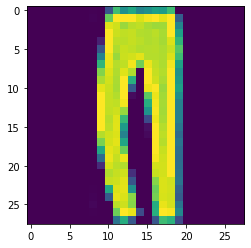

In [50]:
plt.imshow(X_new[2])

In [51]:
np.argmax(y_proba.round(2), axis=1)

array([9, 2, 1])

In [52]:
# predicting the class of these 3 elements

predict_x=model.predict(X_new) 
y_pred=np.argmax(predict_x,axis=1)
y_pred

array([9, 2, 1])

In [53]:
np.array(class_names)[y_pred] # getting the class names of the predicted elements

array(['Ankle Boot', 'Pullover', 'Trouser'], dtype='<U11')

In [54]:
Y_new = Y_test[:3] # evaluating the prediction by matching with y_test
Y_new

array([9, 2, 1], dtype=uint8)

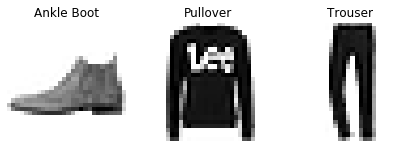

In [55]:
# Plotting the predicted elements

plt.figure(figsize=(7.2, 2.4))
for index, image in enumerate(X_new):
    plt.subplot(1, 3, index + 1)
    plt.imshow(image, cmap="binary", interpolation="nearest")
    plt.axis('off')
    plt.title(class_names[Y_test[index]], fontsize=12)
plt.subplots_adjust(wspace=0.2, hspace=0.5)

plt.show()

In [56]:
model.save("my_keras_model.h5")

In [57]:
model_2 = keras.models.load_model("my_keras_model.h5")
y_proba1 = model_2.predict(X_new)
y_proba1.round(2)

array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.99],
       [0.  , 0.  , 0.99, 0.  , 0.01, 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ]],
      dtype=float32)

## Save log of your Model according to check point

In [60]:
root_logdir = os.path.join(os.curdir, "my_logs")

In [59]:
pwd

'/home/akashchauhansejapan1652/cloudxlab_jupyter_notebooks'

In [61]:
def get_run_logdir():
    import time
    run_id = time.strftime("run_%Y_%m_%d-%H_%M_%S")
    return os.path.join(root_logdir, run_id)

run_logdir = get_run_logdir()
run_logdir

'./my_logs/run_2022_05_05-11_43_50'

In [72]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [73]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=(28,28)))# Add flatten layer
model.add(keras.layers.Dense(300,activation="relu"))
model.add(keras.layers.Dense(100,activation="relu"))
model.add(keras.layers.Dense(10,activation="softmax"))

In [74]:
model.compile(loss="sparse_categorical_crossentropy",
              #optimizer=keras.optimizers.SGD(lr=1e-3),
              optimizer="sgd",
             metrics=["accuracy"]
             # metrics=[keras.metrics.sparse_categorical_accuracy, ]
             )

In [76]:
# Creating custom callback

class PrintValTrainRatioCallback(keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs):
        print("\n SG :: val/train: {:.2f}".format(logs["val_loss"] / logs["loss"]))

In [77]:
val_train_ratio_cb = PrintValTrainRatioCallback() # calling the custom callback
checkpoint_cb = keras.callbacks.ModelCheckpoint("my_keras_model.h5", save_best_only=True)

#tensorboard
tensorboard_cb = keras.callbacks.TensorBoard(run_logdir)


In [78]:
history = model.fit(X_train, Y_train, epochs=30,
                    validation_data=(X_valid, Y_valid),
                    callbacks=[checkpoint_cb, tensorboard_cb, val_train_ratio_cb])

Epoch 1/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.4891 - accuracy: 0.8306 - val_loss: 0.4617 - val_accuracy: 0.8400

 SG :: val/train: 0.94
Epoch 2/30
1719/1719 [==============================] - 4s 3ms/step - loss: 0.4422 - accuracy: 0.8453 - val_loss: 0.4069 - val_accuracy: 0.8630

 SG :: val/train: 0.92
Epoch 3/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.4136 - accuracy: 0.8546 - val_loss: 0.4944 - val_accuracy: 0.8144

 SG :: val/train: 1.20
Epoch 4/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.3933 - accuracy: 0.8622 - val_loss: 0.3782 - val_accuracy: 0.8694

 SG :: val/train: 0.96
Epoch 5/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.3787 - accuracy: 0.8667 - val_loss: 0.3638 - val_accuracy: 0.8688

 SG :: val/train: 0.96
Epoch 6/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.3625 - accuracy: 0.8716 - val_loss: 0.3604 - val_accuracy: 0.8752

 SG :: val/trai